Before running it need to install with

```
sudo apt install libfluidsynth3 fluid-soundfont-gm
pip install note-seq pyfluidsynth music21
```



Note representation options:
 - symbolic - a, b, c, etc, music can be processed as text
 - numeric - represent sound frequency -> could express relation between consonant and dissonant sonds
 
Can symbols replace numbers? probably yes -> if you transpose your training set into every key (tonality), so that all possible relations between symbols are catched. 
 
In numbers your need to learn only that triad where numbers have values relations x, 5x/4, 3x/2 are good, but in symbols you need to learn all possible symbolic combinations of such triads to make sure that network learned to build such a triad from any note.

Try to experiment with both methods



## Dataset

We are going to generate completely synthetic dataset: Major and minor scales

For symbolic representation we will use symbolic notes + number of the octave where A4 is note A of the middle octave 440Hz + we will use sharp (#) and flat (- minus) signs (same as in [music21](http://web.mit.edu/music21/doc/usersGuide/usersGuide_02_notes.html) library).

Music is built on 12 notes. Interval between adjacent notes is called semitone (S). Two semitones is a tone (T):

C C# D D# E F F# G G# A A# B

Major scale structure is: T T S T T T S

Minor scale structure is: T S T T S T T

We are going to generate minor and major scales for all notes in range C0 - C8
 

In [9]:
def generate_scale(from_note='C', octave=4, minor=False):
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    major_seq = [2, 2, 1, 2, 2, 2, 1]
    minor_seq = [2, 1, 2, 2, 1, 2, 2]
    idx = notes.index(from_note)
    res = []
    res.append('{}{}'.format(notes[idx], octave))
    for i in minor_seq if minor else major_seq:
        idx += i
        if idx > 11:
            idx = idx - 12
            octave += 1
        res.append('{}{}'.format(notes[idx], octave))
    return res

In [10]:
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

In [11]:
data = [generate_scale(x, octave) for octave in range(0, 8) for x in notes ]

utility funtion to preview 

In [32]:
import music21

def streamFromLetters(letters):
    s = music21.stream.Stream()
    for x in letters:
        s.append(music21.note.Note(x))
    return s

def preview(inp, midi=False):
    s = streamFromLetters(inp)
    s.show('midi' if midi else None)

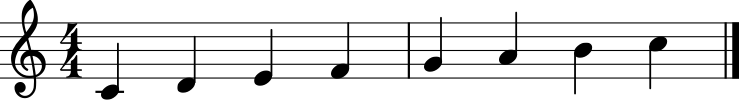

In [33]:
preview(data[48])

In [29]:
preview(data[48], midi=True)

In [41]:
import note_seq

def streamToNoteSeq(s):
    ns = note_seq.protobuf.music_pb2.NoteSequence()
    for i, n in enumerate(s):
        ns.notes.add(pitch=n.pitch.midi, start_time=i * 0.5, end_time= (i + 1) * 0.5, velocity=80)
    return ns

In [43]:
ns = streamToNoteSeq(streamFromLetters(data[48]))
note_seq.plot_sequence(ns)

Loading BokehJS ...

Now let's try to build a simple model that learns major scales and continues given input into a scale

In [34]:
n = music21.note.Note('C')

In [ ]:
n.pitch.midi